In [30]:
import pandas as pd
import numpy as np

pd.set_option('display.max_colwidth', None)
pd.set_option('max_columns', None)


import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
data = pd.read_csv("../../data/twitter-scraped-data/bad-ukraine/processed.csv")

In [31]:
data.sort_values(by=['score'], ascending=False)[:5]

,id,conversation_id,date,tweet,hashtags,user_id_str,username,name,link,urls,photos,nlikes,nreplies,nretweets,search,reply_to,score,cleaned_tweet,lg_number_of_capital_letters,lg_number_of_words_starting_with_capital_letters,lg_percent_of_complex_nouns,lg_percent_of_nouns,lg_percent_of_complex_verbs,lg_percent_of_verbs,lg_percent_of_complex_adjectives,lg_percent_of_adjectives,lg_noun_to_verb_ratio,lg_number_of_words,lg_number_of_complex_words,lg_percent_of_complex_words,lg_number_of_sentences,lg_average_sentence_length,lg_fog_index,lg_pisarek_index,lg_contains_badword,purified_tweet
9168,1504771225708646401,1504771225708646401,2022-03-18 11:46:32,"🇺🇦 Oficjalne konto Ukrainy na Instagramie wrzuciło zdjęcie żołnierza rajstopach i na platformach. Są dumni z osób LGBTQ+.🏳️‍🌈 To niezwykle ważne w czasach, w których słowa ""kto cię obroni, te p*dały w rurkach?!"" to ulubione hasło narodowców, nazistów, homofobów. (1/4) https://t.co/LjghMjU1lz",[],70697514,queerpl,Queer.pl,https://twitter.com/queerpl/status/1504771225708646401,[],['https://pbs.twimg.com/media/FOIFcsGXoAA_P6Z.jpg'],7211,53,970,Nazistów,[],8234,"Oficjalne konto Ukrainy na Instagramie wrzuciło zdjęcie żołnierza rajstopach i na platformach. Są dumni z osób LGBTQ+.️‍ To niezwykle ważne w czasach, w których słowa ""kto cię obroni, te p*dały w rurkach?!"" to ulubione hasło narodowców, nazistów, homofobów. (1/4)",10,6,0.000000,33.333333,0.0,10.256410,2.564103,10.256410,3.25,39,1,2.564103,5,10.200000,4.145641,4.105320,False,oficjalne konto ukrainy instagramie wrzuciło zdjęcie żołnierza rajstopach platformach dumni osób lgbtq niezwykle ważne czasach słowa obroni pdały rurkach ulubione hasło narodowców nazistów homofobów 14
5268,1504164174859018249,1504164174859018249,2022-03-16 19:34:19,"Ruska ""Prawda"" pisze o potrzebie ""denazyfikacji Polski"". No i teraz wystarczy przypomnieć sobie, kto przez ostatnie lata mówił i pisał o autorytarnej władzy w Polsce, o faszyzującym rządzie, o nazistach maszerujących w Warszawie 11 listopada...",[],1202288292680683521,JacekMilewski2,Jacek Milewski,https://twitter.com/JacekMilewski2/status/1504164174859018249,[],[],3250,135,888,Nazistach,[],4273,"Ruska ""Prawda"" pisze o potrzebie ""denazyfikacji Polski"". No i teraz wystarczy przypomnieć sobie, kto przez ostatnie lata mówił i pisał o autorytarnej władzy w Polsce, o faszyzującym rządzie, o nazistach maszerujących w Warszawie 11 listopada...",6,6,5.714286,22.857143,0.0,14.285714,8.571429,14.285714,1.60,35,5,14.285714,4,11.500000,9.214286,8.376218,False,ruska prawda pisze potrzebie denazyfikacji polski wystarczy przypomnieć ostatnie lata mówił pisał autorytarnej władzy polsce faszyzującym rządzie nazistach maszerujących warszawie listopada
4421,1504725909022072832,1504725909022072832,2022-03-18 08:46:27,"Wiecie, że rubel się umacnia? Że sankcje słabo działają? Że, w momencie ludobójstwo na Ukrainie, do Putina NIEPRZERWANIE płyną miliardy? Wiecie komu może Putin dziekować? Berlinowi. Jedno jest pewne. UE, w której dominują Niemcy, to żadna ""unia"", to mafia politycznych gangsterów.",[],389580215,DawidWildstein,Dawid Wildstein,https://twitter.com/DawidWildstein/status/1504725909022072832,[],[],3242,182,821,Ludobójstwo,[],4245,"Wiecie, że rubel się umacnia? Że sankcje słabo działają? Że, w momencie ludobójstwo na Ukrainie, do Putina NIEPRZERWANIE płyną miliardy? Wiecie komu może Putin dziekować? Berlinowi. Jedno jest pewne. UE, w której dominują Niemcy, to żadna ""unia"", to mafia politycznych gangsterów.",23,12,0.000000,19.512195,0.0,19.512195,2.439024,7.317073,1.00,41,2,4.878049,7,8.000000,4.294077,3.811216,False,wiecie rubel umacnia sankcje słabo działają momencie ludobójstwo ukrainie putina nieprzerwanie płyną miliardy wiecie komu putin dziekować berlinowi pewne ue dominują niemcy unia mafia politycznych gangsterów
4426,1504723059760062475,1504723059760062475,2022-03-18 08:35:08,"Zbliża się Wielkanoc. Dla wielu polskich rodzin, także tych, które nie są religijne, jest to ważna tradycja. Rynek

In [8]:
data['search'].unique()

array(['Ludobójcach', 'Wołyńskiego', 'UPowcami', 'Nazistom', 'Nazisty',
       'Nazisto', 'Ludobójstwa', 'Ludobójcy', 'Faszysta', 'UPowców',
       'Naziści', 'OUN', 'Wołyńskim', 'Ludobójców', 'Ludobójstwo',
       'Wołyński', 'Nazistach', 'Wołyniowi', 'Ludobójcami', 'Wołyniu',
       'Wołynia', 'Nazistami', 'Ludobójstwie', 'Faszysto', 'Wołyń',
       'UPowcy', 'Nazistę', 'Nazistów', 'Faszystów', 'Upowcach',
       'Ludobójstwem', 'Wołyniem', 'Naziście', 'Wołyńskie', 'Ludobójcom'],
      dtype=object)

In [9]:
print(f'Liczba słów kluczowych: {len(data["search"].unique())}')

Liczba słów kluczowych: 35


## Najczęściej pojawiające się słowa kluczowe

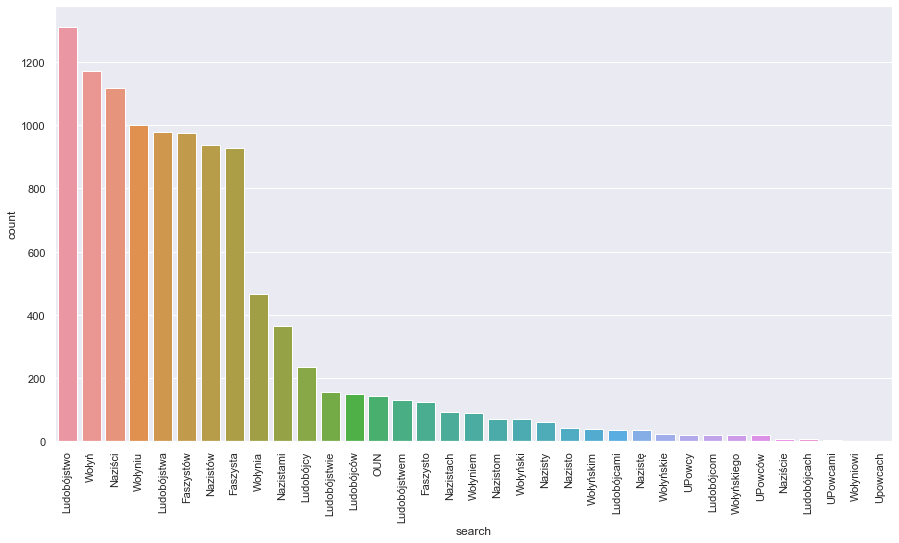

In [10]:
sns.set(rc = {'figure.figsize':(15,8)})
p = sns.countplot(x='search', data=data, order = data['search'].value_counts().index)
plt.setp(p.get_xticklabels(), rotation=90)
plt.show()

In [11]:
print(f'Liczba unikatowych tweetów: {len(data["id"].unique())}')

Liczba unikatowych tweetów: 10843


In [12]:
data_per = data.groupby(by="search").count()['id'].reset_index()
data_per['count'] = data_per['id'].apply(lambda x: int(x)/546899*100)
data_per = data_per.sort_values(by = 'count', ascending = False).drop('id', axis = 1).reset_index(drop = True)
data_per['count_cumsum'] = data_per['count'].cumsum()

In [14]:
data_per[:20]

,search,count,count_cumsum
0,Ludobójstwo,0.239715,0.239715
1,Wołyń,0.214116,0.453832
2,Naziści,0.204608,0.658440
3,Wołyniu,0.182849,0.841289
4,Ludobójstwa,0.178826,1.020115
5,Faszystów,0.178644,1.198759
6,Nazistów,0.171147,1.369906
7,Faszysta,0.169501,1.539407
8,Wołynia,0.085391,1.624797
9,Nazistami,0.066557,1.691354


In [16]:
data_per[:20]['search'].values

array(['Ludobójstwo', 'Wołyń', 'Naziści', 'Wołyniu', 'Ludobójstwa',
       'Faszystów', 'Nazistów', 'Faszysta', 'Wołynia', 'Nazistami',
       'Ludobójcy', 'Ludobójstwie', 'Ludobójców', 'OUN', 'Ludobójstwem',
       'Faszysto', 'Nazistach', 'Wołyniem', 'Nazistom', 'Wołyński'],
      dtype=object)

In [9]:
data[data['search']=='stopss']

,id,conversation_id,date,tweet,hashtags,user_id_str,username,name,link,urls,...,lg_noun_to_verb_ratio,lg_number_of_words,lg_number_of_complex_words,lg_percent_of_complex_words,lg_number_of_sentences,lg_average_sentence_length,lg_fog_index,lg_pisarek_index,lg_contains_badword,purified_tweet
26826,1462193116803440643,1462193116803440643,2021-11-20 23:56:19,"Australijski gwiazdor futbolu AFL, Liam Jones,...","['stopsegregacjisanitarnej', 'stopss']",829404955048103936,mietek_smutny,Mieczysław Prawy 🇵🇱 🥇💯,https://twitter.com/mietek_smutny/status/14621...,[],...,3.333333,25,2,8.000000,1,29.00,13.200000,13.124405,False,australijski gwiazdor futbolu afl liam jones p...
26827,1462189566899728385,1462189566899728385,2021-11-20 23:42:13,"🇳🇱 Holandia, szpital flamandzki. Na 27 pacjent...","['stopsegregacjisanitarnej', 'stopss']",829404955048103936,mietek_smutny,Mieczysław Prawy 🇵🇱 🥇💯,https://twitter.com/mietek_smutny/status/14621...,[],...,-1.000000,10,2,20.000000,2,7.00,10.000000,10.307764,False,holandia szpital flamandzki pacjentów srowidow...
26828,1462189190280585220,1462189190280585220,2021-11-20 23:40:43,"🇬🇧 ""Szczepionka"" Pfizer✡️: Wskaźniki zakrzepic...","['stopsegregacjisanitarnej', 'stopss']",829404955048103936,mietek_smutny,Mieczysław Prawy 🇵🇱 🥇💯,https://twitter.com/mietek_smutny/status/14621...,[],...,2.000000,13,2,15.384615,4,4.25,7.453846,7.862075,False,szczepionka pfizer wskaźniki zakrzepicy żył gł...
26829,1462183053112094721,1461825000600748032,2021-11-20 23:16:20,@WojciechKucha10 Miała prawo. Nie po to Pan Bó...,"['stopsegregacjisanitarnej', 'stopss']",1241521447589330945,Yolay90339058,Yolay,https://twitter.com/Yolay90339058/status/14621...,[],...,1.333333,16,1,6.250000,2,9.50,5.700000,5.075985,False,miała prawo bóg dał ludziom wolną wolę ograniczał
26830,1462181623823278085,1461737021819473926,2021-11-20 23:10:39,@ArturKazek @Ankara47856561 @coolfonpl Zadzwoń...,"['stopsegregacjisanitarnej', 'stopss', 'nieszc...",1241521447589330945,Yolay90339058,Yolay,https://twitter.com/Yolay90339058/status/14621...,[],...,0.000000,3,0,0.000000,1,3.00,1.200000,1.500000,False,zadzwońcie
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1041278,1499545239001845761,1499498882132111390,2022-03-04 01:40:19,@phatcoochyy Now that’s what’s Hott 😘😂🥰😍🤣,[],2452332998,STOPS4YNGRBTTMS,STOPS4YNGRBTTMS,https://twitter.com/STOPS4YNGRBTTMS/status/149...,[],...,0.500000,9,0,0.000000,1,10.00,3.600000,4.500000,False,now thats whats hott
1041279,1499544859132190730,1499544859132190730,2022-03-04 01:38:49,I can't remember anything Can't tell if this i...,[],794243634484936710,Limao_odoomer,Limão,https://twitter.com/Limao_odoomer/status/14995...,[],...,3.000000,52,0,0.000000,1,54.00,20.800000,26.000000,False,cant remember anything cant tell if this is tr...
1041280,1499543216340844545,1499543216340844545,2022-03-04 01:32:17,Indian government stops film inspired by #gay ...,['gay'],382715859,hanksgeoff,GeustGeoff,https://twitter.com/hanksgeoff/status/14995432...,['http://ow.ly/amUg30scsPG'],...,-1.000000,7,0,0.000000,2,3.50,1.400000,1.750000,False,indian government stops film inspired soldier
1041281,1499538859478110211,1499512091794984963,2022-03-04 01:14:58,@BLACKEDGABBY “ it only stops if you want it to,[],1476377156599095299,NoTHeadCIA,𝘿𝙞𝙧𝙚𝙘𝙩𝙤𝙧 𝙅𝙪𝙣𝙠𝙤,https://twitter.com/NoTHeadCIA/status/14995388...,[],...,3.000000,8,0,0.000000,3,3.00,1.066667,1.333333,False,it only stops if you want it


**15 keywordsów pokrywa 80% zebranych danych. Ekspercko patrząc wygląda też na wmiarę zbilansowany rozkład pomiędzy słowami kluczowymi bedącymi bardziej pro vs. anty szczepionkowymi**

## Najpopularniejsze słowa kluczowe

**Popularność jest mierzona przez sumę likeów, replies i retweetów na tweecie.**

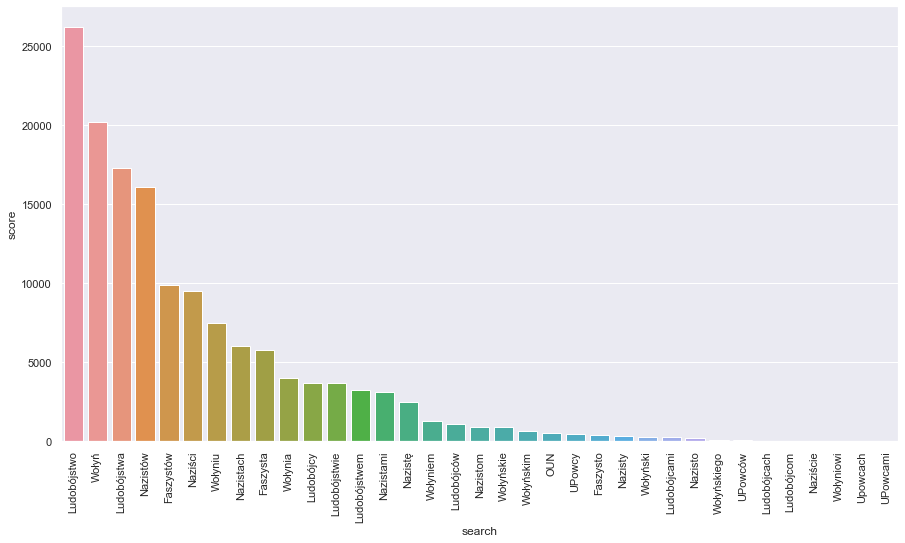

In [17]:
data_score = data.groupby(by="search").sum()['score'].reset_index().sort_values(by = "score", ascending = False)

sns.set(rc = {'figure.figsize':(15,8)})
p = sns.barplot(x='search', y = 'score', data= data_score)
plt.setp(p.get_xticklabels(), rotation=90)
plt.show()

In [18]:
print(f'Suma popularności (score): {data["score"].sum()}')

Suma popularności (score): 146231


In [19]:
data_per = data.groupby(by="search").sum()['score'].reset_index()
data_per['score_percentage'] = data_per['score'].apply(lambda x: int(x)/6747621*100)
data_per = data_per.sort_values(by = 'score_percentage', ascending = False).reset_index(drop = True)
data_per['score_percentage_cumsum'] = data_per['score_percentage'].cumsum()

In [23]:
data_per[:20]['search'].values

array(['Ludobójstwo', 'Wołyń', 'Ludobójstwa', 'Nazistów', 'Faszystów',
       'Naziści', 'Wołyniu', 'Nazistach', 'Faszysta', 'Wołynia',
       'Ludobójcy', 'Ludobójstwie', 'Ludobójstwem', 'Nazistami',
       'Nazistę', 'Wołyniem', 'Ludobójców', 'Nazistom', 'Wołyńskie',
       'Wołyńskim'], dtype=object)

**Tutaj sytuacja wygląda podobnie 15 keywordsów odpowiada za 80% sumy popularności**